In [73]:
import numpy as np
import time

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 

In [74]:
# setting class names
class_names  =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

(x_train,y_train),(x_test,y_test)=cifar10.load_data()



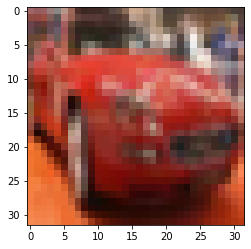

In [75]:
plt.imshow(x_train[5])


In [76]:
x_train=x_train/255.0
x_train.shape


(50000, 32, 32, 3)

In [77]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

In [78]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [79]:
y_test.shape,y_train.shape

((10000, 10), (50000, 10))

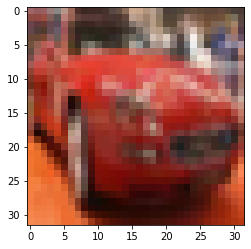

In [80]:
plt.imshow(x_train[5])


(a) No BatchNormalization


In [36]:
def make_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.ZeroPadding2D(padding=(1, 1), data_format=None))
  model.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 2, padding = 'valid',data_format = None))
  model.add(tf.keras.layers.Flatten())
  # model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Dense(units=64,activation='relu'))  #acc = 64,64,
  # model.add(tf.keras.layers.Dense(units=128,activation='relu’))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))  #acc 64

  return model

In [ ]:
model = make_model() 
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=opt,  # for SGD
    metrics=['accuracy']  # report accuracy during training
)

In [ ]:
start_time = time.time()
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), verbose=0)
# model.fit()
end_time = time.time()
print("Testing time: ", end_time-start_time)

In [ ]:
_,acc = model.evaluate(x_test,y_test, verbose=0)

In [ ]:
print(_,acc)

1.1350041627883911 0.635699987411499


(b) Two Dense Layers. (Note: The last Dense layer should
have 10 nodes as there are 10 classes. For the Dense layer
before that, use 64 nodes.)

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_15 (ZeroPaddi (None, 34, 34, 3)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 64)        1792      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 18496)             0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 18496)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                1183808   
_________________________________________________________________
dense_24 (Dense)             (None, 10)              

(b)  Dense Layers. (Note: The last Dense layer should have 10 nodes as there are 10 classes. For the Dense layer before that, use 64 nodes.Two)
bold textbold text



```
# This is formatted as code
```



In [41]:
def make_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.ZeroPadding2D(padding=(2, 1), data_format=None))
  model.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
  model.add(tf.keras.layers.BatchNormalization())
    # axis=-1, momentum=0.99, epsilon=0.01, center=True, scale=True,beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',  moving_variance_initializer='ones', beta_regularizer=None,
    # gamma_regularizer=None, beta_constraint=None, gamma_constraint=None,
    # renorm=False, renorm_clipping=None, renorm_momentum=0.99, fused=None,
    # trainable=True, virtual_batch_size=None, adjustment=None, name=None))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 2, padding = 'valid',data_format = None))
  model.add(tf.keras.layers.Flatten())
  # model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Dense(units=64,activation='relu'))  #acc = 64,64,
  # model.add(tf.keras.layers.Dense(units=128,activation='relu’))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))  #acc 64

  return model

In [42]:
model = make_model() 
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=opt,  # for SGD
    metrics=['accuracy']  # report accuracy during training
)

In [43]:
start_time = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), verbose=0)
# model.fit()
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  58.40661573410034


In [44]:
_,acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0885 - accuracy: 0.6223


In [45]:
print(_,acc)

1.088453769683838 0.6223000288009644


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 34, 34, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 34, 34, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 34, 34, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0         
_________________________________________________________________
dropout (Dropout)            (None, 18496)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

**(c) 2 blocks of Conv2D -> BatchNorm2D->MaxPooling2D**

In [82]:
def make_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.ZeroPadding2D(padding=(2,2), data_format=None))
  model.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
  model.add(tf.keras.layers.BatchNormalization())
    # axis=-1, momentum=0.99, epsilon=0.01, center=True, scale=True,beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',  moving_variance_initializer='ones', beta_regularizer=None,
    # gamma_regularizer=None, beta_constraint=None, gamma_constraint=None,
    # renorm=False, renorm_clipping=None, renorm_momentum=0.99, fused=None,
    # trainable=True, virtual_batch_size=None, adjustment=None, name=None))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 2, padding = 'valid',data_format = None))
  model.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
  model.add(tf.keras.layers.BatchNormalization())
    # axis=-1, momentum=0.99, epsilon=0.01, center=True, scale=True,beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',  moving_variance_initializer='ones', beta_regularizer=None,
    # gamma_regularizer=None, beta_constraint=None, gamma_constraint=None,
    # renorm=False, renorm_clipping=None, renorm_momentum=0.99, fused=None,
    # trainable=True, virtual_batch_size=None, adjustment=None, name=None))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 2, padding = 'valid',data_format = None))
  model.add(tf.keras.layers.Flatten())
  # model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Dense(units=64,activation='relu'))  #acc = 64,64,
  # model.add(tf.keras.layers.Dense(units=128,activation='relu’))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))  #acc 64

  return model

In [83]:
model = make_model() 
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=opt,  # for SGD
    metrics=['accuracy']  # report accuracy during training
)

In [84]:
start_time = time.time()
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), verbose=0)
# model.fit()
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  174.62647342681885


In [85]:
_,acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.0473 - accuracy: 0.7203


d) 3 blocks of Conv2D -> BatchNorm2D->MaxPooling2D
Add a table contrasting the performance of the given architecture with
all above variations. State your analysis. **bold text**

In [69]:
def make_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.ZeroPadding2D(padding=(2,2), data_format=None))
  model.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
  model.add(tf.keras.layers.BatchNormalization())
    # axis=-1, momentum=0.99, epsilon=0.01, center=True, scale=True,beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',  moving_variance_initializer='ones', beta_regularizer=None,
    # gamma_regularizer=None, beta_constraint=None, gamma_constraint=None,
    # renorm=False, renorm_clipping=None, renorm_momentum=0.99, fused=None,
    # trainable=True, virtual_batch_size=None, adjustment=None, name=None))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 2, padding = 'valid',data_format = None))
  model.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
  model.add(tf.keras.layers.BatchNormalization())
    # axis=-1, momentum=0.99, epsilon=0.01, center=True, scale=True,beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',  moving_variance_initializer='ones', beta_regularizer=None,
    # gamma_regularizer=None, beta_constraint=None, gamma_constraint=None,
    # renorm=False, renorm_clipping=None, renorm_momentum=0.99, fused=None,
    # trainable=True, virtual_batch_size=None, adjustment=None, name=None))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 2, padding = 'valid',data_format = None))
  model.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
  model.add(tf.keras.layers.BatchNormalization())
    # axis=-1, momentum=0.99, epsilon=0.01, center=True, scale=True,beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',  moving_variance_initializer='ones', beta_regularizer=None,
    # gamma_regularizer=None, beta_constraint=None, gamma_constraint=None,
    # renorm=False, renorm_clipping=None, renorm_momentum=0.99, fused=None,
    # trainable=True, virtual_batch_size=None, adjustment=None, name=None))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 2, padding = 'valid',data_format = None))
  model.add(tf.keras.layers.Flatten())
  # model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Dense(units=64,activation='relu'))  #acc = 64,64,
  # model.add(tf.keras.layers.Dense(units=128,activation='relu’))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))  #acc 64

  return model

In [70]:
model = make_model() 
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=opt,  # for SGD
    metrics=['accuracy']  # report accuracy during training
)

In [71]:
start_time = time.time()
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), verbose=0)
# model.fit()
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  205.97135305404663


In [72]:
_,acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.8001 - accuracy: 0.7568
